<a href="https://colab.research.google.com/github/almeidafran/genome_assembly/blob/main/grafico_result_mapeamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

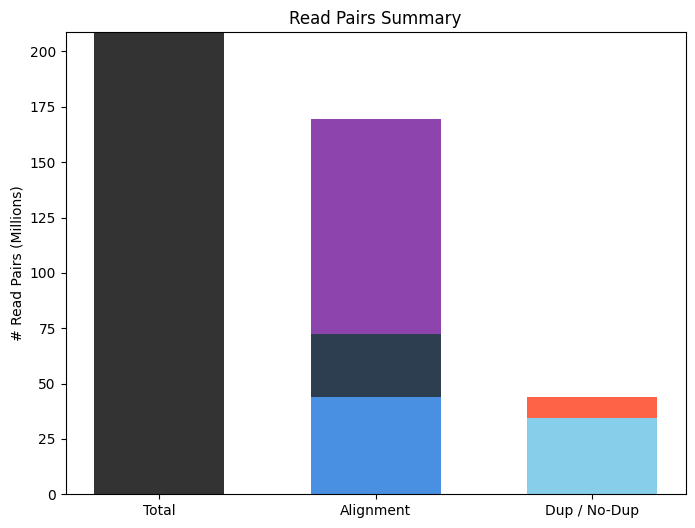

In [6]:

# Dados fornecidos
categories = ['Total', 'Alignment', 'Dup / No-Dup']
total_reads = 208667928
mapped_reads_percentage = 21.09
low_mapq_percentage = 13.58
unmapped_reads_percentage = 46.55
no_dup_percentage = 16.49
pcr_dup_percentage = 4.59

# Valores absolutos (convertendo porcentagens para milhões de pares de leitura)
total_read_pairs = total_reads / 1e6
mapped_read_pairs = total_read_pairs * mapped_reads_percentage / 100
low_mapq_read_pairs = total_read_pairs * low_mapq_percentage / 100
unmapped_read_pairs = total_read_pairs * unmapped_reads_percentage / 100
no_dup_read_pairs = total_read_pairs * no_dup_percentage / 100
pcr_dup_read_pairs = total_read_pairs * pcr_dup_percentage / 100

# Criar os valores para o gráfico de barras
data = {
    'Total': [total_read_pairs],
    'Alignment': [mapped_read_pairs, low_mapq_read_pairs, unmapped_read_pairs],
    'Dup / No-Dup': [no_dup_read_pairs, pcr_dup_read_pairs],
}

# Configuração das cores para o gráfico
colors = {
    'Total': ['#333333'],  # cor preta
    'Alignment': ['#4a90e2', '#2c3e50', '#8e44ad'],  # azul, cinza escuro, roxo
    'Dup / No-Dup': ['#87ceeb', '#ff6347'],  # azul claro, vermelho
}

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar as barras
bar_width = 0.6
for i, category in enumerate(categories):
    heights = data[category]
    bottom = 0
    for j, height in enumerate(heights):
        ax.bar(i, height, bar_width, bottom=bottom, color=colors[category][j])
        bottom += height

# Adicionar labels e legendas
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)
ax.set_ylabel('# Read Pairs (Millions)')
ax.set_title('Read Pairs Summary')
ax.set_ylim([0, total_read_pairs])
plt.show()


# Plotar as barras e adicionar legendas para a legenda
bars = []  # lista para armazenar as barras para a legenda
for i, category in enumerate(categories):
    heights = data[category]
    bottom = 0
    for j, height in enumerate(heights):
        bar = ax.bar(i, height, 0.6, bottom=bottom, color=colors[category][j])
        bars.append(bar)
        bottom += height

# Nomes para a legenda
legend_labels = ['Total Read Pairs', 'Mapped Read Pairs', 'Unmapped Read Pairs', 'No-Dup Read Pairs', 'PCR Dup Read Pairs']
ax.legend([bar[0] for bar in bars], legend_labels)

plt.show()
